<a href="https://colab.research.google.com/github/Mehtizada/Analytics/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d vetrirah/customer

Dataset URL: https://www.kaggle.com/datasets/vetrirah/customer
License(s): CC0-1.0
  0% 0.00/105k [00:00<?, ?B/s]
100% 105k/105k [00:00<00:00, 4.50MB/s]


In [2]:
!unzip /content/customer.zip

Archive:  /content/customer.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: sample_submission.csv   


In [3]:
import pandas as pd

df = pd.read_csv('/content/Train.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(['ID', 'Var_1', 'Segmentation'], axis = 1)
y = df['Segmentation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
X_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
2821,Female,Yes,38,Yes,Doctor,1.0,Low,4.0
6192,Female,No,33,No,Engineer,0.0,Low,5.0
1393,Female,Yes,49,No,Engineer,1.0,Low,1.0
812,Female,No,26,No,Executive,8.0,Low,3.0
2215,Female,No,56,Yes,Doctor,3.0,Low,1.0
...,...,...,...,...,...,...,...,...
5226,Male,Yes,29,Yes,Healthcare,0.0,Low,2.0
5390,Male,No,31,No,Healthcare,1.0,Low,4.0
860,Female,No,40,Yes,Lawyer,4.0,Low,1.0
7603,Male,Yes,29,Yes,Artist,0.0,Low,5.0


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [7]:
cat_features = X_train.select_dtypes(include = 'object').columns
num_features = X_train.select_dtypes(exclude = 'object').columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)
col_names = preprocessor.get_feature_names_out()
X_train_prepared = pd.DataFrame(X_train_prepared, columns = col_names)
X_test_prepared = pd.DataFrame(X_test_prepared, columns = col_names)

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


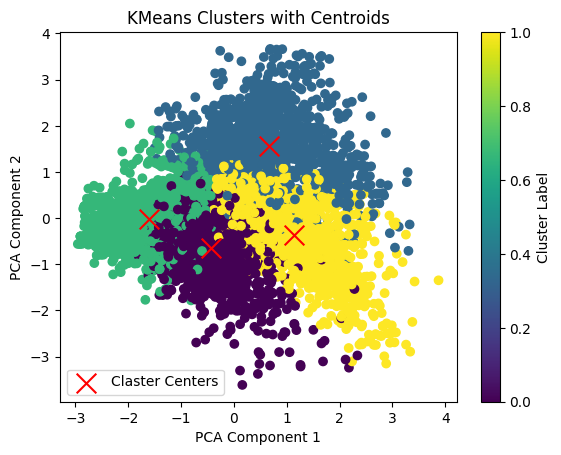

In [12]:
kmeans = KMeans (n_init = 'auto', n_clusters = 4, random_state = 42)
kmeans.fit(X_train_prepared)

cluster_labels = kmeans.predict(X_train_prepared)

pca = PCA (n_components = 2)
X_train_2d = pca.fit_transform (X_train_prepared)

cluster_centers_2d = pca.transform (kmeans.cluster_centers_)

plt.scatter (X_train_2d [:, 0], X_train_2d [:, 1], c = cluster_labels, cmap = 'viridis', marker = 'o')
plt.scatter (cluster_centers_2d [:, 0], cluster_centers_2d [:, 1], c = 'red', marker = 'x', s = 200, label = 'Claster Centers')
plt.xlabel ('PCA Component 1')
plt.ylabel ('PCA Component 2')
plt.title ('KMeans Clusters with Centroids')
plt.legend()
plt.colorbar (label = 'Cluster Label')
plt.show ()

In [13]:
silhouette_avg = silhouette_score (X_train_prepared, cluster_labels)
print (f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.18245088447507757
